In [46]:
import pandas as pd

In [47]:
#Copy file path:#file = r"C:\Users\tlynx\Downloads\CrimeStats/Crime Stats.csv"
file = r"C:\Users\tlynx\Downloads\CrimeStats/OfficeSupply.csv"
df = pd.read_csv(file)
df

,Segment,State,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Date
0,Government,Lagos State,A4 Paper,None,1618.5,?3.00,?20.00,1/1/2014
1,Government,Osun State,A4 Paper,None,1321.0,?3.00,?20.00,1/1/2014
2,Midmarket,Ogun State,A4 Paper,None,2178.0,?3.00,?15.00,6/1/2014
3,Midmarket,Osun State,A4 Paper,None,888.0,?3.00,?15.00,6/1/2014
4,Midmarket,Ondo State,A4 Paper,None,2470.0,?3.00,?15.00,6/1/2014
...,...,...,...,...,...,...,...,...
695,Small Business,Ogun State,Stapler,High,2475.0,?260.00,?300.00,3/1/2014
696,Small Business,Ondo State,Stapler,High,546.0,?260.00,?300.00,10/1/2014
697,Government,Ondo State,Pencil,High,1368.0,?5.00,?7.00,2/1/2014
698,Government,Lagos State,Biro,High,723.0,?10.00,?7.00,4/1/2014


In [48]:
df.columns = df.columns.str.replace(' ', '')

In [49]:
df['Segment'] = df['Segment'].str.strip()
df['State'] = df['State'].str.strip()
df['Product'] = df['Product'].str.strip()
df['DiscountBand'] = df['DiscountBand'].str.strip()

#Remove white spaces

In [50]:
df.duplicated().sum()

0

In [51]:
df.isnull().sum()

Segment               0
State                 0
Product               0
DiscountBand          0
UnitsSold             0
ManufacturingPrice    0
SalePrice             0
Date                  0
dtype: int64

In [52]:
df.dtypes

Segment                object
State                  object
Product                object
DiscountBand           object
UnitsSold             float64
ManufacturingPrice     object
SalePrice              object
Date                   object
dtype: object

In [53]:
df['ManufacturingPrice'] = df['ManufacturingPrice'].str.replace('[^0-9.]', '', regex = True)
df['SalePrice'] = df['SalePrice'].str.replace('[^0-9.]', '', regex = True)
#Remove the unnecessary characteristics

In [54]:
#Convert from manufacturingPrice to Date to integer from object
df['ManufacturingPrice'] = pd.to_numeric(df['ManufacturingPrice'], errors = 'coerce')
df['SalePrice'] = pd.to_numeric(df['SalePrice'], errors = 'coerce')

In [55]:
df.dtypes

Segment                object
State                  object
Product                object
DiscountBand           object
UnitsSold             float64
ManufacturingPrice    float64
SalePrice             float64
Date                   object
dtype: object

In [56]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')
#convert to datetime

In [57]:
df.dtypes

Segment                       object
State                         object
Product                       object
DiscountBand                  object
UnitsSold                    float64
ManufacturingPrice           float64
SalePrice                    float64
Date                  datetime64[ns]
dtype: object

In [58]:
#Map out by creating a dictionary
df['DiscountRate'] = df['DiscountBand'].map(
    {
    'None': 0,
    'Low': 0.01,
    'Medium': 0.05,
    'High': 0.1       
    }
)

In [59]:
df

,Segment,State,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,Date,DiscountRate
0,Government,Lagos State,A4 Paper,None,1618.5,3.0,20.0,2014-01-01,0.0
1,Government,Osun State,A4 Paper,None,1321.0,3.0,20.0,2014-01-01,0.0
2,Midmarket,Ogun State,A4 Paper,None,2178.0,3.0,15.0,2014-06-01,0.0
3,Midmarket,Osun State,A4 Paper,None,888.0,3.0,15.0,2014-06-01,0.0
4,Midmarket,Ondo State,A4 Paper,None,2470.0,3.0,15.0,2014-06-01,0.0
...,...,...,...,...,...,...,...,...,...
695,Small Business,Ogun State,Stapler,High,2475.0,260.0,300.0,2014-03-01,0.1
696,Small Business,Ondo State,Stapler,High,546.0,260.0,300.0,2014-10-01,0.1
697,Government,Ondo State,Pencil,High,1368.0,5.0,7.0,2014-02-01,0.1
698,Government,Lagos State,Biro,High,723.0,10.0,7.0,2014-04-01,0.1


In [73]:
df['GrossSales'] = df['UnitsSold']*df['SalePrice']

In [61]:
df['Discount'] = df['DiscountRate']*df['SalePrice']

In [62]:
df['Revenue'] = df['GrossSales']-df['Discount']

In [63]:
df['ManufactureCost'] = df['UnitsSold']-df['ManufacturingPrice']

In [64]:
df['ProfitBeforeTax'] = df['Revenue']-df['ManufactureCost']

In [65]:
df['Tax'] = 0.05*df['ProfitBeforeTax']

In [66]:
df['Profit'] = df['ProfitBeforeTax']-df['Tax']

In [67]:
df['ProfitMargin'] = df['Profit']/df['Revenue']

In [68]:
df

,Segment,State,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,Date,DiscountRate,GrossSales,Discount,Revenue,ManufactureCost,ProfitBeforeTax,Tax,Profit,ProfitMargin
0,Government,Lagos State,A4 Paper,None,1618.5,3.0,20.0,2014-01-01,0.0,32370.0,0.0,32370.0,1615.5,30754.5,1537.725,29216.775,0.902588
1,Government,Osun State,A4 Paper,None,1321.0,3.0,20.0,2014-01-01,0.0,26420.0,0.0,26420.0,1318.0,25102.0,1255.100,23846.900,0.902608
2,Midmarket,Ogun State,A4 Paper,None,2178.0,3.0,15.0,2014-06-01,0.0,32670.0,0.0,32670.0,2175.0,30495.0,1524.750,28970.250,0.886754
3,Midmarket,Osun State,A4 Paper,None,888.0,3.0,15.0,2014-06-01,0.0,13320.0,0.0,13320.0,885.0,12435.0,621.750,11813.250,0.886881
4,Midmarket,Ondo State,A4 Paper,None,2470.0,3.0,15.0,2014-06-01,0.0,37050.0,0.0,37050.0,2467.0,34583.0,1729.150,32853.850,0.886744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,Ogun State,Stapler,High,2475.0,260.0,300.0,2014-03-01,0.1,742500.0,30.0,742470.0,2215.0,740255.0,37012.750,703242.250,0.947166
696,Small Business,Ondo State,Stapler,High,546.0,260.0,300.0,2014-10-01,0.1,163800.0,30.0,163770.0,286.0,163484.0,8174.200,155309.800,0.948341
697,Government,Ondo State,Pencil,High,1368.0,5.0,7.0,2014-02-01,0.1,9576.0,0.7,9575.3,1363.0,8212.3,410.615,7801.685,0.814772
698,Government,Lagos State,Biro,High,723.0,10.0,7.0,2014-04-01,0.1,5061.0,0.7,5060.3,713.0,4347.3,217.365,4129.935,0.816144


In [69]:
Total_Revenue = df['Revenue'].sum()

print(f'The Total revenue is {Total_Revenue}')

The Total revenue is 127927139.53999999


In [71]:
Total_MC = df['ManufactureCost'].sum()
print(f'The Total revenue is {Total_MC}')

The Total revenue is 1058272.0


Report for Segment

In [72]:
Segment_Report = df.groupby('Segment')[['GrossSales', 'Revenue', 'ProfitBeforeTax']].sum()
Segment_Report

,GrossSales,Revenue,ProfitBeforeTax
Segment,,,
Channel Partners,1935162.0,1935099.00,1783549.50
Enterprise,21069000.0,21068386.25,20909339.25
Government,56403066.5,56401001.49,55959465.99
Midmarket,2582670.0,2582584.80,2419162.80
Small Business,45941700.0,45940068.00,45797350.00


In [74]:
import matplotlib.pyplot as plt
#to import charts

<Axes: xlabel='Segment'>

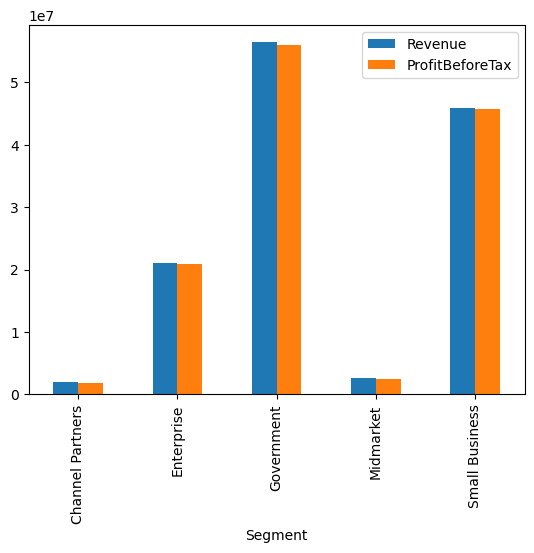

In [81]:
Segment_Report[['Revenue', 'ProfitBeforeTax']].plot(kind = 'bar',  )